In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
route_df = pd.read_csv('../python-Amos/route_df.csv')

In [4]:
route_df.head()

,latitude,longitude,elevation,time
0,24.674256,121.768730,8.0,2022-04-15 19:08:13+00:00
1,24.674291,121.768728,6.0,2022-04-15 19:08:14+00:00
2,24.674329,121.768746,6.4,2022-04-15 19:08:15+00:00
3,24.674374,121.768770,6.4,2022-04-15 19:08:16+00:00
4,24.674417,121.768814,6.4,2022-04-15 19:08:17+00:00


In [5]:
# add elevation difference
route_df['elevation_diff'] = route_df['elevation'].diff()
route_df.head()

,latitude,longitude,elevation,time,elevation_diff
0,24.674256,121.768730,8.0,2022-04-15 19:08:13+00:00,NaN
1,24.674291,121.768728,6.0,2022-04-15 19:08:14+00:00,-2.0
2,24.674329,121.768746,6.4,2022-04-15 19:08:15+00:00,0.4
3,24.674374,121.768770,6.4,2022-04-15 19:08:16+00:00,0.0
4,24.674417,121.768814,6.4,2022-04-15 19:08:17+00:00,0.0


In [6]:
import haversine as hs

In [7]:
# create a haversine function to calculate distance

def haversine_distance(lat1, lon1, lat2, lon2) -> float:
    distance = hs.haversine(
            point1 = (lat1,lon1),
            point2 = (lat2,lon2),
            unit = hs.Unit.METERS
    )
    return np.round(distance, 2)

In [8]:
# lets check the function

haversine_distance(
    lat1=route_df.iloc[0]['latitude'],
    lon1=route_df.iloc[0]['longitude'],
    lat2=route_df.iloc[1]['latitude'],
    lon2=route_df.iloc[1]['longitude']
)

3.89

In [9]:
# loop it for all points

distances = [np.nan]

for i in range(len(route_df)):
    if i == 0:
        continue
    else:
        distances.append(haversine_distance(
            lat1=route_df.iloc[i - 1]['latitude'],
            lon1=route_df.iloc[i - 1]['longitude'],
            lat2=route_df.iloc[i]['latitude'],
            lon2=route_df.iloc[i]['longitude']
        ))
        
route_df['distance'] = distances
route_df.head()

,latitude,longitude,elevation,time,elevation_diff,distance
0,24.674256,121.768730,8.0,2022-04-15 19:08:13+00:00,NaN,NaN
1,24.674291,121.768728,6.0,2022-04-15 19:08:14+00:00,-2.0,3.89
2,24.674329,121.768746,6.4,2022-04-15 19:08:15+00:00,0.4,4.63
3,24.674374,121.768770,6.4,2022-04-15 19:08:16+00:00,0.0,5.55
4,24.674417,121.768814,6.4,2022-04-15 19:08:17+00:00,0.0,6.53


In [10]:
# calculate elevation gain
route_df[route_df['elevation_diff']>=0]['elevation_diff'].sum()

4721.399453639983

In [11]:
# calculate total distance
route_df['distance'].sum()

201470.50000000003

In [12]:
# create colums for plotting distance to elevation

route_df['cum_elevation'] = route_df['elevation_diff'].cumsum()
route_df['cum_distance'] = route_df['distance'].cumsum()

route_df.head()

,latitude,longitude,elevation,time,elevation_diff,distance,cum_elevation,cum_distance
0,24.674256,121.768730,8.0,2022-04-15 19:08:13+00:00,NaN,NaN,NaN,NaN
1,24.674291,121.768728,6.0,2022-04-15 19:08:14+00:00,-2.0,3.89,-2.0,3.89
2,24.674329,121.768746,6.4,2022-04-15 19:08:15+00:00,0.4,4.63,-1.6,8.52
3,24.674374,121.768770,6.4,2022-04-15 19:08:16+00:00,0.0,5.55,-1.6,14.07
4,24.674417,121.768814,6.4,2022-04-15 19:08:17+00:00,0.0,6.53,-1.6,20.60


In [13]:
route_df = route_df.fillna(0)

In [14]:
route_df.to_csv('route_df_elevation_distance.csv')

Text(0, 0.5, 'Elevation gain (m)')

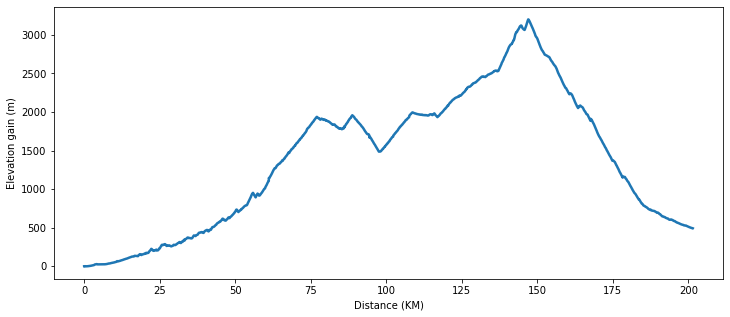

In [15]:
fig = plt.figure(figsize=(12,5))
plt.plot(route_df['cum_distance']/1000,route_df['cum_elevation'],lw=2.5)
plt.xlabel('Distance (KM)')
plt.ylabel('Elevation gain (m)')